In [1]:
# -- use this line at the beginning of your notebook to turn on interactive plots
%matplotlib notebook

# Imports
import sys
import matplotlib.pyplot as plt  # plotting library
from matplotlib import colors
import numpy as np  # work with numeric arrays without labeled axes
import xarray as xr  # work with arrays with labeled axes
import xrscipy.signal as dsp  # xarray signal filtering etc.
import scipy as sps
from cdb_extras import xarray_support as cdbxr  # access to COMPASS Database (CDB)
import pickle # to save data
from pathlib import Path # to easily work with different files
from progressbar import ProgressBar
from typing import Optional, Union
from dataclasses import dataclass
from typing import Optional
plt.rcParams.update({'font.size': 14})

In [2]:
from core.pedestal_fit import PedestalParams, get_thomson_data, fit, pedestal_params_extraction
from core.tools import _get_plot

In [3]:
# Only use Thomson data from this normalized psi value and up
psi_n_lim = 0.6

In [4]:
test=pedestal_params_extraction(18250, psi_n_lim)

Using stray corrected data


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Number of H-mode intervals : 3


 60% (30 of 50) |##############          | Elapsed Time: 0:00:01 ETA:   0:00:01

Could not fit at 1230ms. Reason: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


 78% (39 of 50) |##################      | Elapsed Time: 0:00:09 ETA:   0:00:05

Could not fit 1 out of 50 measurements.


In [7]:
1+1

<IPython.core.display.Javascript object>


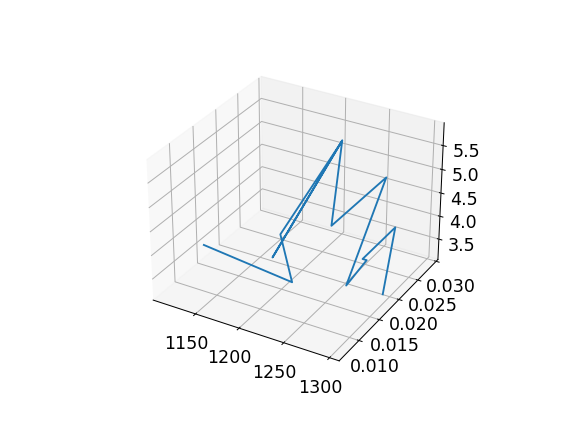

In [5]:
plt.figure().add_subplot(projection='3d')

plt.plot(test.ne_time,test.ne_width,test.ne_height)
plt.show()

In [6]:
# Just for testing the fitting algorithm
if False: # Set to True and run this block of code to test the fitting algorithm
    shot_nr = 18251
    time = 1200
    ne, ne_err, Te, Te_err, pe, pe_err, psi_n, psi_n_fit_coords, t_H_mode_start, t_H_mode_end = get_thomson_data(shot_nr,psi_n_lim)
    d = pe.sel(time=time, method='nearest')
    e = pe_err.sel(time=time, method='nearest')
    psi_n_one = psi_n.sel(time=time, method='nearest')

    fit(data=d, error=e, psi_n=psi_n_one,psi_n_lim=psi_n_lim, shot_nr=shot_nr, plot=True)